# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nogliki
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | dunedin
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | ghadamis
Processing Record 12 of Set 1 | bubaque
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | fabens
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | demyansk
Processing Record 22 of Set 1 | palora
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nogliki,51.8333,143.1667,-5.37,93,78,4.02,RU,1700603045
1,longyearbyen,78.2186,15.6401,0.91,86,75,8.23,SJ,1700603045
2,albany,42.6001,-73.9662,2.75,61,100,0.45,US,1700603045
3,dunedin,-45.8742,170.5036,22.82,74,100,1.79,NZ,1700603045
4,adamstown,-25.0660,-130.1015,20.48,78,100,3.68,PN,1700603046


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

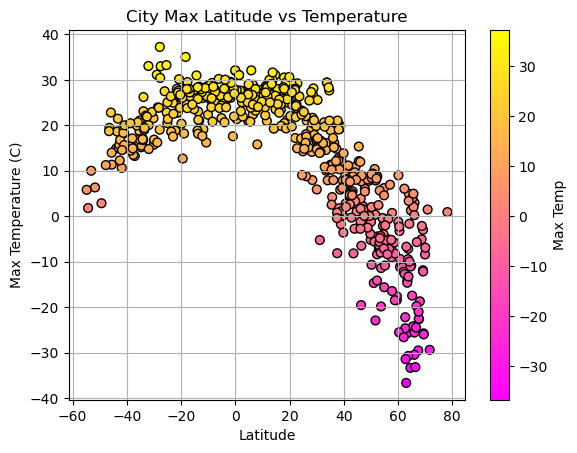

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp", c='Max Temp', cmap=plt.colormaps.get_cmap('spring'), s=40, edgecolor='black')
# Incorporate the other graph properties
plt.title(f'City Max Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

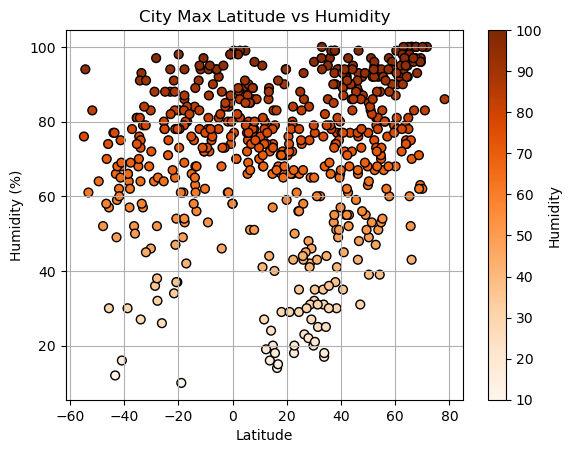

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity', c='Humidity', cmap=plt.colormaps.get_cmap('Oranges'), s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

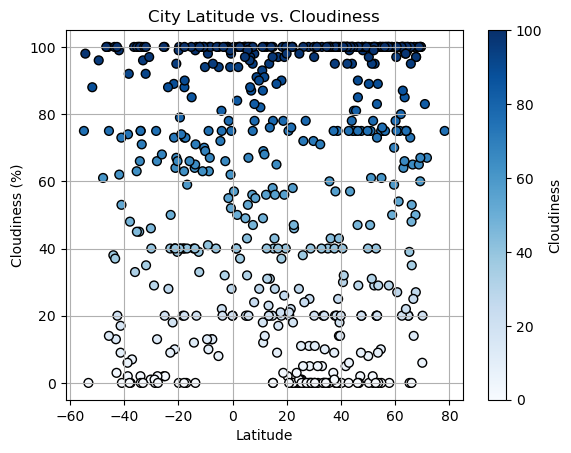

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness', c="Cloudiness", cmap=plt.colormaps.get_cmap('Blues'), s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

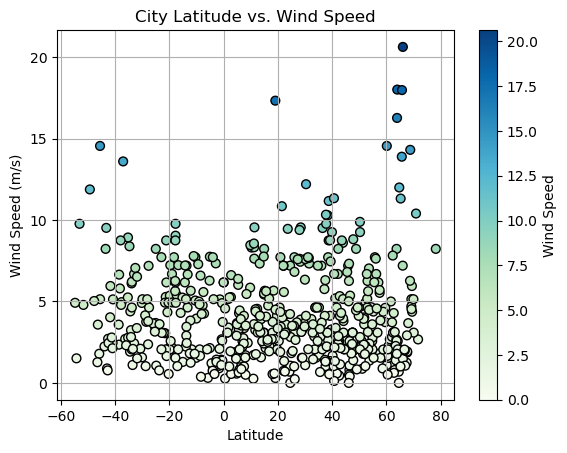

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed', c='Wind Speed',cmap=plt.colormaps.get_cmap('GnBu'), s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def reg(df, x, y):
    # plot scatter
    df.plot.scatter(x, y, s=40, edgecolor="black")
    plt.xlabel('Latitude')

    lr = linregress(df[x], df[y])
    tmp = lr.slope * df[x] + lr.intercept

    print(f"The r-value is: {lr.rvalue}")

    plt.plot(df[x], tmp, color='orange')
    _ = f'y = {lr.slope:.2f}x + {lr.intercept:.2f}'
    plt.legend([_], loc='best', labelcolor='orange', fontsize=14, handlelength=0)




In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nogliki,51.8333,143.1667,-5.37,93,78,4.02,RU,1700603045
1,longyearbyen,78.2186,15.6401,0.91,86,75,8.23,SJ,1700603045
2,albany,42.6001,-73.9662,2.75,61,100,0.45,US,1700603045
6,klyuchi,52.2667,79.1667,-8.38,75,29,4.93,RU,1700603046
7,iqaluit,63.7506,-68.5145,-7.15,79,75,8.23,CA,1700603046


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,dunedin,-45.8742,170.5036,22.82,74,100,1.79,NZ,1700603045
4,adamstown,-25.0660,-130.1015,20.48,78,100,3.68,PN,1700603046
5,edinburgh of the seven seas,-37.0676,-12.3116,13.25,78,7,13.60,SH,1700603046
9,port lincoln,-34.7333,135.8667,15.17,68,100,8.39,AU,1700603046
13,codrington,-38.2667,141.9667,15.42,64,92,5.80,AU,1700603047


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8765657115133507


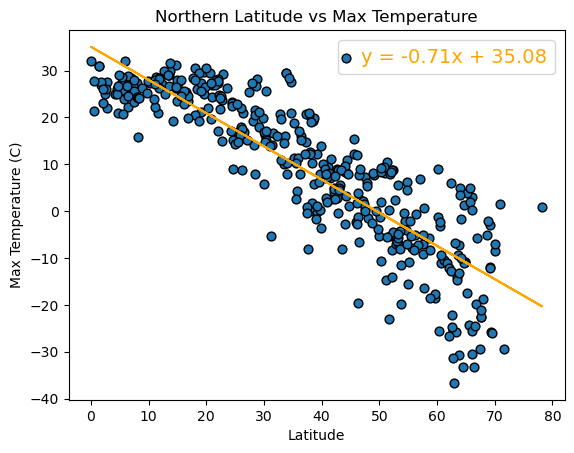

In [17]:
# Linear regression on Northern Hemisphere
reg(northern_df, 'Lat', 'Max Temp')
plt.ylabel("Max Temperature (C)")
plt.title(f"Northern Latitude vs Max Temperature")

plt.savefig("output_data/north_temp.png")

The r-value is: 0.4121057168607245


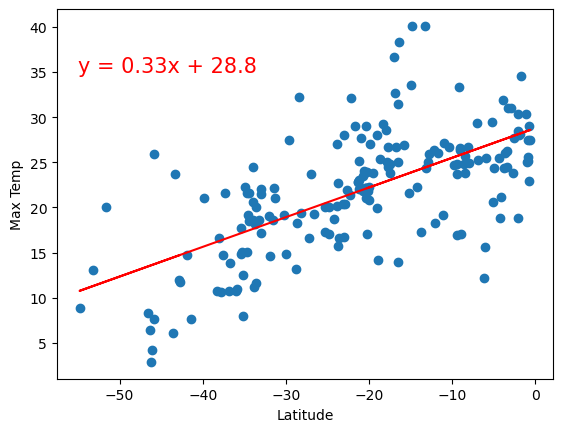

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


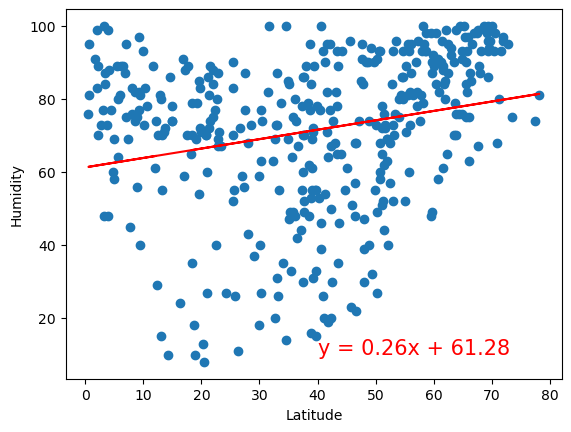

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


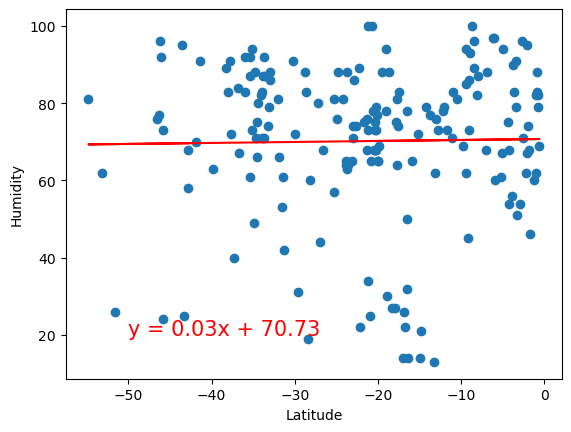

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


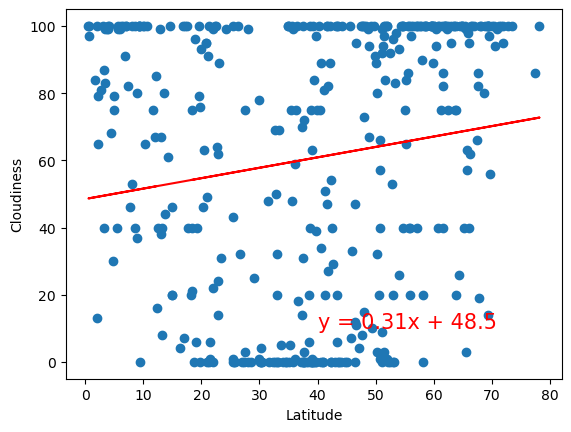

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


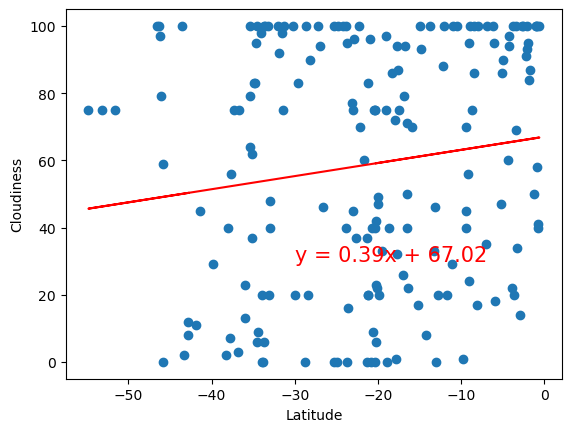

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


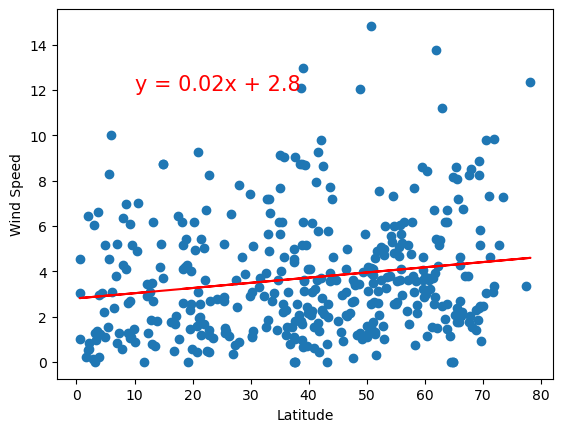

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


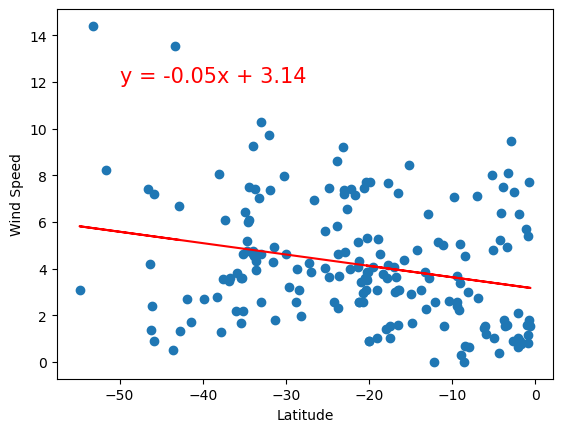

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE